In [1]:
from pathlib import Path
from scipy.io import wavfile
import scipy.signal
import pandas as pd
from tqdm.auto import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import os

In [3]:
root_folder = Path('..') / 'data' / 'train' / 'audio'

lines = []

set_all = set()

for path in root_folder.rglob('*'):
    if '_background_noise_' not in path.parts and path.is_file():
        set_all.add(str(path.relative_to(root_folder)))

len(set_all)

64721

In [4]:
val_list_file = Path('..') / 'data' / 'train' / 'validation_list.txt'
test_list_file = Path('..') / 'data' / 'train' / 'testing_list.txt'

with open(val_list_file, 'r') as file:
    set_val_all = set(line.strip().replace('/', '\\') for line in file)
with open(test_list_file, 'r') as file:
    set_test_all = set(line.strip().replace('/', '\\') for line in file)
        
set_train_all = set_all - set_val_all - set_test_all
print(f'All {len(set_all)}, train {len(set_train_all)}, val {len(set_val_all)}, test {len(set_test_all)}')

All 64721, train 51088, val 6798, test 6835


In [5]:
folders_main = ['on', 'four', 'yes', 'nine', 'three', 'no', 'stop', 'five', 'right', 'down', 'one', 'eight', 'off', 'zero', 'two', 'up', 'six', 'go', 'left', 'seven']
print('Main folders:', folders_main)

folders_main_ser = pd.Series(list(folders_main))
set_not_main = {str(path.relative_to(root_folder))
                for path in root_folder.rglob('*')
                if not folders_main_ser.isin(path.parts).any() and path.is_file()}
        
set_main = set_all - set_not_main        
set_train_main = set_train_all - set_not_main
set_val_main = set_val_all - set_not_main
set_test_main = set_test_all - set_not_main
print(f'All {len(set_all)}, main {len(set_main)}, not main {len(set_not_main)}, train {len(set_train_main)}, val {len(set_val_main)}, test {len(set_test_main)}')

Main folders: ['on', 'four', 'yes', 'nine', 'three', 'no', 'stop', 'five', 'right', 'down', 'one', 'eight', 'off', 'zero', 'two', 'up', 'six', 'go', 'left', 'seven']
All 64721, main 47348, not main 17380, train 37158, val 5071, test 5119


In [6]:
list_1_sec = []
lengths_list = []

for f in tqdm(set_all):
    _, data = wavfile.read(root_folder / f)
    if len(data) == 16000:
        list_1_sec.append(f)
    lengths_list.append(len(data))
    
set_1_sec = set(list_1_sec)
del list_1_sec
lengths = Counter(lengths_list)
del lengths_list
set_not_1_sec = set_all - set_1_sec
print(f'All {len(set_all)}, 1 sec {len(set_1_sec)}, not 1 sec {len(set_not_1_sec)}')

  0%|          | 0/64721 [00:00<?, ?it/s]

All 64721, 1 sec 58252, not 1 sec 6469


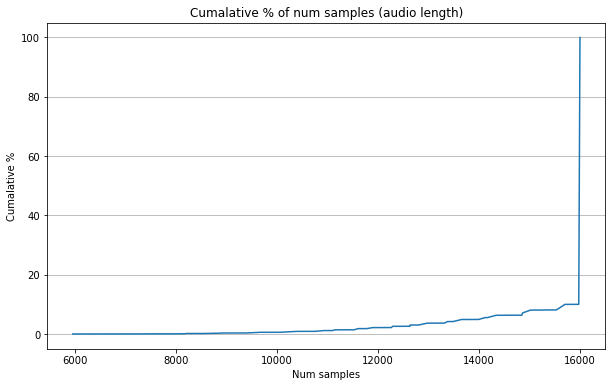

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(pd.Series(lengths).sort_index().cumsum() / sum(lengths.values()) * 100)
plt.grid(axis='y', which='both')
plt.xlabel('Num samples')
plt.ylabel('Cumalative %')
plt.title('Cumalative % of num samples (audio length)')
plt.show()

In [8]:
set_main_1_sec = set_main - set_not_1_sec        
set_train_main_1_sec = set_train_main - set_not_1_sec
set_val_main_1_sec = set_val_main - set_not_1_sec
set_test_main_1_sec = set_test_main - set_not_1_sec

print(f'Files (not including background noise): {len(set_all)}, 1 sec {len(set_1_sec)},  not 1 sec {len(set_not_1_sec)}')
print(f'Main {len(set_main)}, main 1 sec {len(set_main_1_sec)}, train {len(set_train_main_1_sec)}, val {len(set_val_main_1_sec)}, test {len(set_test_main_1_sec)}')

Files (not including background noise): 64721, 1 sec 58252,  not 1 sec 6469
Main 47348, main 1 sec 42874, train 33566, val 4619, test 4689


In [16]:
list(set_train_main_1_sec)[:10]

['up\\3ea77ede_nohash_1.wav',
 'zero\\b59fe16d_nohash_1.wav',
 'up\\5efb758c_nohash_0.wav',
 'yes\\25132942_nohash_2.wav',
 'seven\\190821dc_nohash_1.wav',
 'down\\1625acd8_nohash_2.wav',
 'right\\8a28231e_nohash_2.wav',
 'stop\\6078eb0d_nohash_0.wav',
 'seven\\512dc91a_nohash_0.wav',
 'right\\ce7a8e92_nohash_1.wav']

In [14]:
list(set_val_main_1_sec)[:10]

['left\\f84762e5_nohash_0.wav',
 'up\\264f471d_nohash_4.wav',
 'eight\\56eb74ae_nohash_4.wav',
 'five\\7fd25f7c_nohash_0.wav',
 'four\\56eb74ae_nohash_4.wav',
 'zero\\e54a0f16_nohash_3.wav',
 'yes\\eb0857c0_nohash_0.wav',
 'right\\61bcb275_nohash_0.wav',
 'yes\\e8e960fd_nohash_0.wav',
 'on\\409c962a_nohash_1.wav']

In [15]:
list(set_test_main_1_sec)[:10]

['two\\37dca74f_nohash_1.wav',
 'zero\\964e8cfd_nohash_4.wav',
 'nine\\0f250098_nohash_0.wav',
 'five\\a1533da4_nohash_1.wav',
 'no\\9a69672b_nohash_3.wav',
 'on\\964e8cfd_nohash_4.wav',
 'five\\692a88e6_nohash_2.wav',
 'nine\\a591c2ea_nohash_3.wav',
 'four\\587f3271_nohash_2.wav',
 'two\\8494fba8_nohash_0.wav']

In [12]:
train_main_1_sec_list = []
train_main_1_sec_labels = []

for f in tqdm(sorted(set_train_main_1_sec)):
    _, data = wavfile.read(root_folder / f)
    train_main_1_sec_list.append(data)
    train_main_1_sec_labels.append(os.path.basename(os.path.dirname(f)))

train_main_1_sec_np = np.stack(train_main_1_sec_list)
train_main_1_sec_np.shape, len(train_main_1_sec_labels)

  0%|          | 0/33566 [00:00<?, ?it/s]

((33566, 16000), 33566)

In [17]:
train_main_1_sec_labels[:10]

['down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down']

In [20]:
train_main_1_sec_np

array([[  -5,   -4,   -4, ...,   -9,   -7,  -15],
       [-130, -135, -131, ..., -154, -190, -224],
       [  15,   29,   15, ...,  972, 1090,  934],
       ...,
       [   1,    0,    5, ...,   11,   10,    9],
       [   1,   -6,   -6, ...,  -12,  -13,   -5],
       [ -32,  -28,  -39, ...,  -20,  -42,  -28]], dtype=int16)

In [25]:
train_main_1_sec_np.mean(axis=1).shape

(33566,)

In [26]:
train_main_1_sec_np.mean(axis=1)

array([-4.78375000e-01, -9.63329375e+01,  1.93625000e-01, ...,
        2.33806250e+00,  6.75387500e+00,  7.83125000e-02])

In [21]:
val_main_1_sec_list = []
val_main_1_sec_labels = []

for f in tqdm(sorted(set_val_main_1_sec)):
    _, data = wavfile.read(root_folder / f)
    val_main_1_sec_list.append(data)
    val_main_1_sec_labels.append(os.path.basename(os.path.dirname(f)))

val_main_1_sec_np = np.stack(val_main_1_sec_list)
val_main_1_sec_np.shape, len(val_main_1_sec_labels)

  0%|          | 0/4619 [00:00<?, ?it/s]

((4619, 16000), 4619)

In [22]:
test_main_1_sec_list = []
test_main_1_sec_labels = []

for f in tqdm(sorted(set_test_main_1_sec)):
    _, data = wavfile.read(root_folder / f)
    test_main_1_sec_list.append(data)
    test_main_1_sec_labels.append(os.path.basename(os.path.dirname(f)))

test_main_1_sec_np = np.stack(test_main_1_sec_list)
test_main_1_sec_np.shape, len(test_main_1_sec_labels)

  0%|          | 0/4689 [00:00<?, ?it/s]

((4689, 16000), 4689)

In [23]:
out_intermediate_folder = Path('..') / 'data' / 'intermediate'

In [27]:
np.save(out_intermediate_folder / 'train_main_1_sec_audio.npy', train_main_1_sec_np)

In [28]:
np.save(out_intermediate_folder / 'train_main_1_sec_audio_means.npy', train_main_1_sec_np.mean(axis=1))

In [29]:
np.save(out_intermediate_folder / 'val_main_1_sec_audio.npy', val_main_1_sec_np)

In [30]:
np.save(out_intermediate_folder / 'test_main_1_sec_audio.npy', test_main_1_sec_np)

In [31]:
train_main_1_sec_labels[:10]

['down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down',
 'down']

In [32]:
pd.Series(train_main_1_sec_labels)

0        down
1        down
2        down
3        down
4        down
         ... 
33561    zero
33562    zero
33563    zero
33564    zero
33565    zero
Length: 33566, dtype: object

In [33]:
pd.Series(train_main_1_sec_labels).value_counts()

zero     1734
six      1727
nine     1723
stop     1715
seven    1708
five     1696
two      1693
right    1687
yes      1686
left     1683
three    1672
one      1672
off      1668
down     1667
four     1662
eight    1655
on       1650
go       1647
no       1630
up       1591
dtype: int64

In [34]:
pd.Series(train_main_1_sec_labels).to_csv(out_intermediate_folder / 'train_main_1_sec_labels.csv',
                                          header=False,
                                          index=False)
pd.Series(val_main_1_sec_labels).to_csv(out_intermediate_folder / 'val_main_1_sec_labels.csv',
                                          header=False,
                                          index=False)
pd.Series(test_main_1_sec_labels).to_csv(out_intermediate_folder / 'test_main_1_sec_labels.csv',
                                          header=False,
                                          index=False)